# Barplots for abundance percent (global)

## Packages 

In [1]:
library(ggplot2)

## Load data, LV

In [13]:
LV <- read.csv("/fast/AG_Huebner/huebner3/ANALYSES/20190926_gp_BadOyenhausen/scanpy/20210302/Global_touse/global_CELLTYPE_ABUNDANCE_LV.csv", stringsAsFactors = F)
head(LV)

,X,Patient,variable,value,Gene
,<int>,<chr>,<chr>,<dbl>,<chr>
1,0,H07,Mural,18.26479,PKP2 (n=5)
2,1,H08,Mural,19.47748,PKP2 (n=5)
3,2,H09,Mural,21.29401,PKP2 (n=5)
4,3,H11,Mural,27.13080,PKP2 (n=5)
5,4,H42,Mural,19.51964,PKP2 (n=5)
6,5,H07,EC,15.53661,PKP2 (n=5)


In [2]:
LV$value <- as.numeric(LV$value)
LV_split <- split(LV, LV$Gene)
df <- sapply(unique(LV$Gene), function(i) tapply(LV_split[[i]][,"value"], LV_split[[i]][,"variable"], mean))
df_sd <- sapply(unique(LV$Gene), function(i) tapply(LV_split[[i]][,"value"], LV_split[[i]][,"variable"], sd))
df_melt <- reshape2::melt(df)
df_melt_sd <- reshape2::melt(df_sd)

In [3]:
table(df_melt$Var2)


    PKP2 (n=5)    LMNA (n=12)    RBM20 (n=6)     TTN (n=12) control (n=18) 
             9              9              9              9              9 
   PVneg (n=8) 
             9 

In [4]:
df_melt[,"sd"] <- df_melt_sd$value

In [5]:
head(df_melt)

,Var1,Var2,value,sd
,<fct>,<fct>,<dbl>,<dbl>
1,AD,PKP2 (n=5),0.07365761,0.07490362
2,CM,PKP2 (n=5),24.42816318,9.89609572
3,EC,PKP2 (n=5),13.56810218,2.45511501
4,FB,PKP2 (n=5),27.71501550,5.84181461
5,Lymphoid,PKP2 (n=5),2.66080284,2.44469281
6,Mast,PKP2 (n=5),0.43358249,0.17379580


In [6]:
dat <- df_melt
dat$mean_t <- dat$value
dat$sd_up_t <- dat$value + dat$sd
dat$sd_low_t <- dat$value
dat$Var2 <- factor(dat$Var2, levels=rev(c("control (n=18)", 'LMNA (n=12)', 'TTN (n=12)',
                                                  'RBM20 (n=6)', 'PKP2 (n=5)', 'PVneg (n=8)'))) # Specify order of Y axis

In [11]:
options(repr.plot.width=14, repr.plot.height=17)

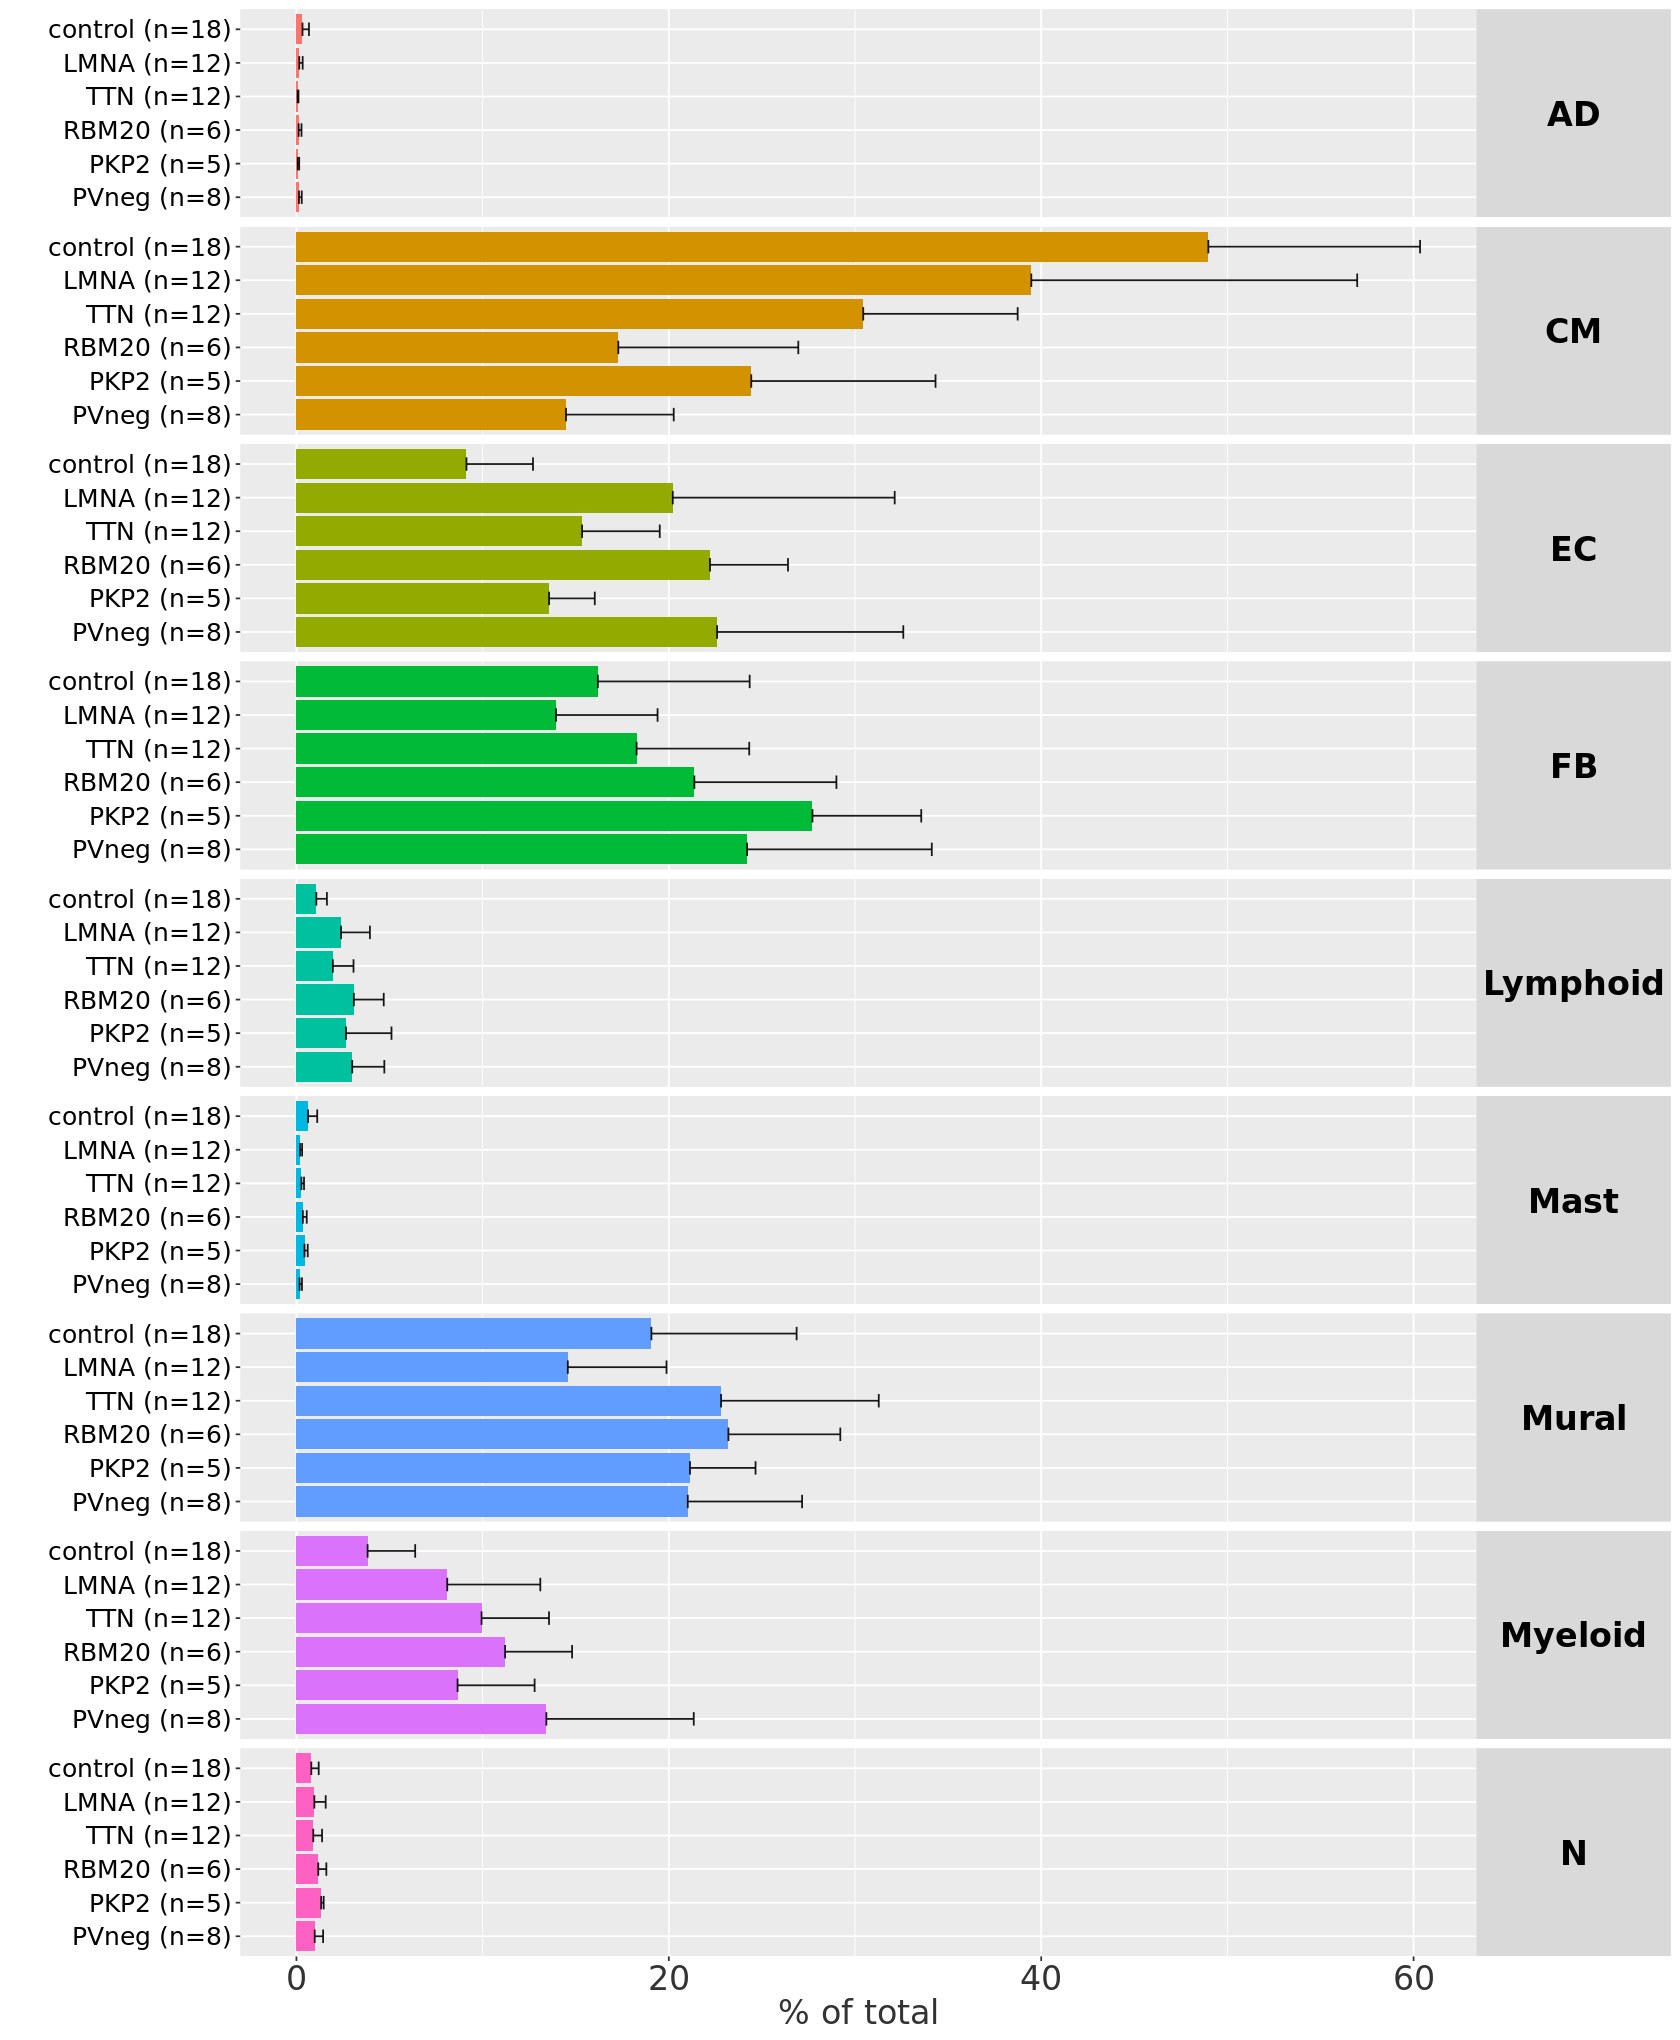

In [12]:
ggplot(dat, aes(x=mean_t, y=Var2, fill=Var1)) + facet_grid(Var1~.) + 
  xlab("% of total") + ylab("") +
  geom_bar(stat = "identity") + 
  geom_errorbar(aes(x=mean_t, y=Var2, xmin=mean_t, xmax=sd_up_t), width=0.4, colour="black", alpha=0.9, size=0.5) + 
  theme(axis.text.x = element_text(color = "grey20", size = 20, angle = 0, face = "plain"),
        axis.text.y = element_text(color = "black", size = 15, angle = 0, face = "plain"),
        axis.title = element_text(color = "grey20", size = 20, angle = 0, hjust = .5, vjust = .5, face = "plain"),
        strip.text = element_text(face="bold", size=12,lineheight=5.0),
        strip.text.y = element_text(size = 20, colour = "black", angle = 0),
        legend.position = "none"
  ) 

As the percentages cover a large range (e.g. CMs vs. Adipocytes), the data are transformed for ggplot

In [7]:
trans <- function(x){pmin(x,2) + 0.1*pmax(x-2,0)} # 4 ist die Grenze zur neuen Achse, die muss gestaucht werden
yticks <- c(seq(0,2,0.5), seq(5,70,15)) # Das sind die Achsen Ticks
dat <- df_melt
dat$mean_t <- trans(dat$value)
dat$sd_up_t <- trans(dat$value + dat$sd)
dat$sd_low_t <- trans(dat$value)
dat$Var2 <- factor(dat$Var2, levels=rev(c("control (n=18)", 'LMNA (n=12)', 'TTN (n=12)',
                                                  'RBM20 (n=6)', 'PKP2 (n=5)', 'PVneg (n=8)'))) # Specify order of Y axis

In [28]:
dat[,"Var2_red"] <- gsub("\\(n=[0-9]*\\)", "", dat[,2])
head(dat)

,Var1,Var2,value,sd,mean_t,sd_up_t,sd_low_t,Var2_red
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,AD,PKP2 (n=5),0.07365761,0.07490362,0.07365761,0.1485612,0.07365761,PKP2
2,CM,PKP2 (n=5),24.42816318,9.89609572,4.24281632,5.2324259,4.24281632,PKP2
3,EC,PKP2 (n=5),13.56810218,2.45511501,3.15681022,3.4023217,3.15681022,PKP2
4,FB,PKP2 (n=5),27.71501550,5.84181461,4.57150155,5.1556830,4.57150155,PKP2
5,Lymphoid,PKP2 (n=5),2.66080284,2.44469281,2.06608028,2.3105496,2.06608028,PKP2
6,Mast,PKP2 (n=5),0.43358249,0.17379580,0.43358249,0.6073783,0.43358249,PKP2


In [41]:
dat[,"Var2_red"]

[1] "PKP2 "    "PKP2 "    "PKP2 "    "PKP2 "    "PKP2 "    "PKP2 "   
 [7] "PKP2 "    "PKP2 "    "PKP2 "    "LMNA "    "LMNA "    "LMNA "   
[13] "LMNA "    "LMNA "    "LMNA "    "LMNA "    "LMNA "    "LMNA "   
[19] "RBM20 "   "RBM20 "   "RBM20 "   "RBM20 "   "RBM20 "   "RBM20 "  
[25] "RBM20 "   "RBM20 "   "RBM20 "   "TTN "     "TTN "     "TTN "    
[31] "TTN "     "TTN "     "TTN "     "TTN "     "TTN "     "TTN "    
[37] "control " "control " "control " "control " "control " "control "
[43] "control " "control " "control " "PVneg "   "PVneg "   "PVneg "  
[49] "PVneg "   "PVneg "   "PVneg "   "PVneg "   "PVneg "   "PVneg "

In [73]:
dat$Var2_red <- factor(dat$Var2_red, 
                       levels=rev(unique(dat$Var2_red)[c(5,2,4,3,1,6)]))

In [32]:
options(repr.plot.width=14, repr.plot.height=17)

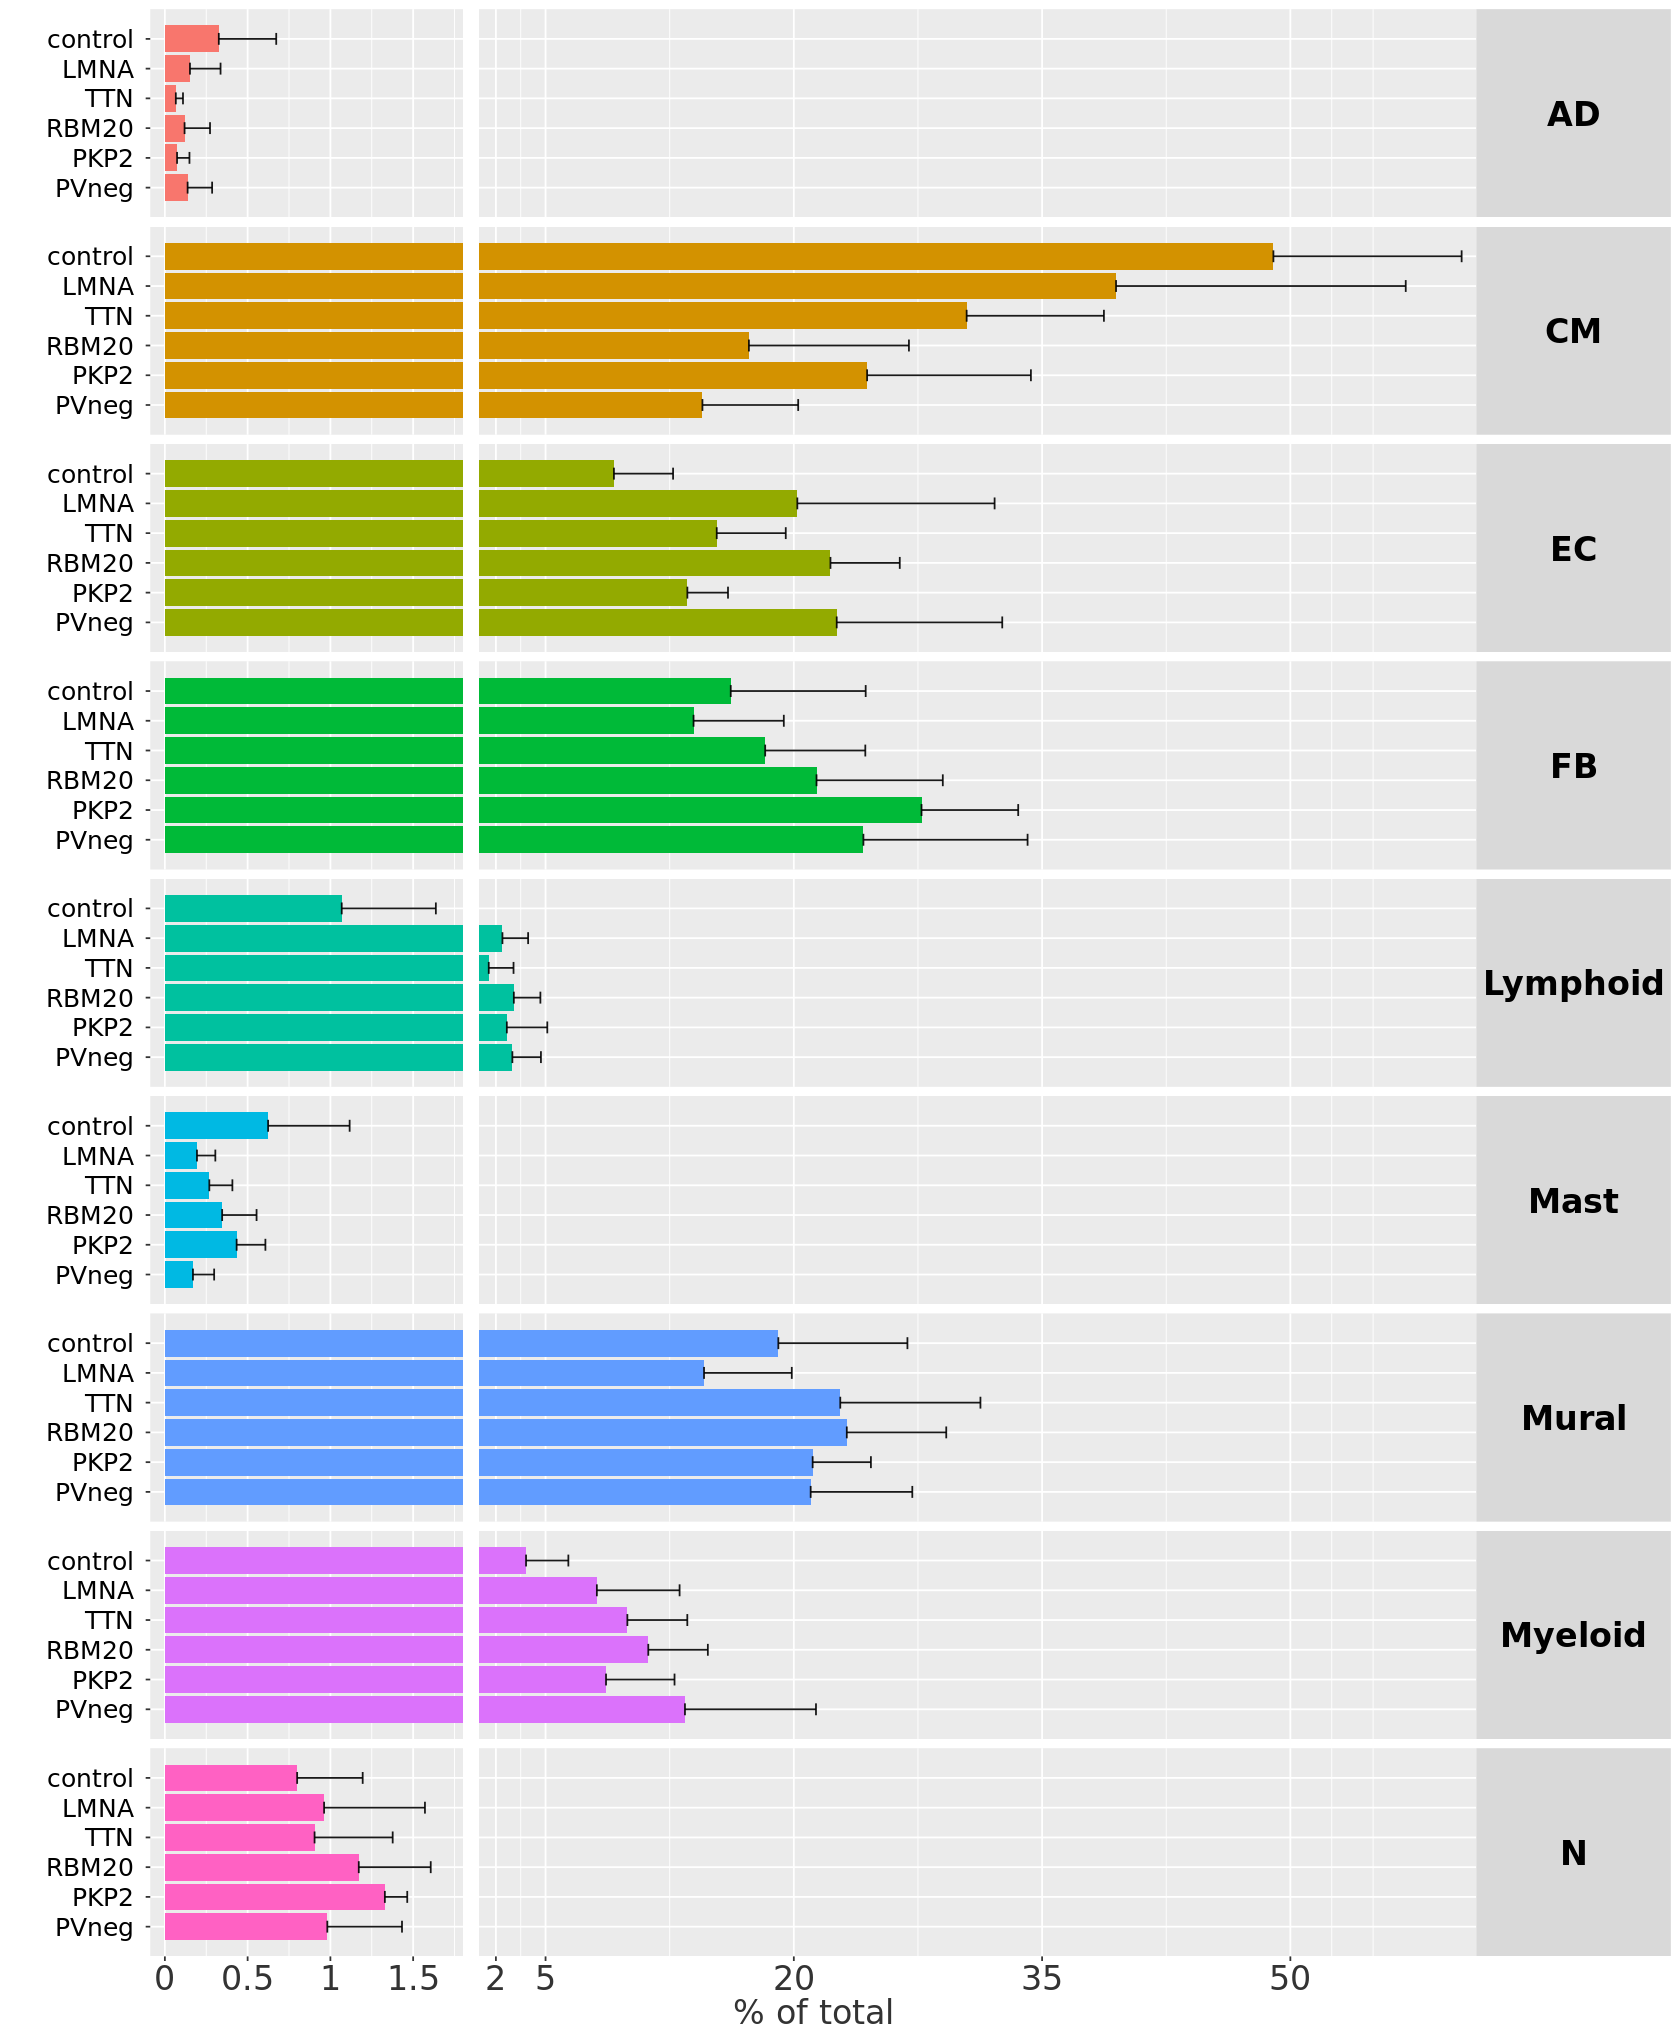

In [74]:
ggplot(dat, aes(x=mean_t, y=Var2_red, fill=Var1)) + facet_grid(Var1~.) + 
  xlab("% of total") + ylab("") +
  geom_bar(stat = "identity") + 
  geom_errorbar(aes(x=mean_t, y=Var2_red, xmin=mean_t, xmax=sd_up_t), width=0.4, colour="black", alpha=0.9, size=0.5) + 
  theme(axis.text.x = element_text(color = "grey20", size = 20, angle = 0, face = "plain"),
        axis.text.y = element_text(color = "black", size = 15, angle = 0, face = "plain"),
        axis.title = element_text(color = "grey20", size = 20, angle = 0, hjust = .5, vjust = .5, face = "plain"),
        strip.text = element_text(face="bold", size=12,lineheight=5.0),
        strip.text.y = element_text(size = 20, colour = "black", angle = 0),
        legend.position = "none"
  ) + #geom_vline(xintercept = 7.5) + 
  geom_rect(aes(ymin=0, ymax=7, xmin=1.8, xmax=1.9), fill="white") + 
  scale_x_continuous(limits=c(0,NA), breaks=trans(yticks), labels=yticks, expand = c(0.01, 0.01))
  

#dev.off()

In [75]:
LV <- read.csv("/fast/AG_Huebner/huebner3/ANALYSES/20190926_gp_BadOyenhausen/scanpy/20210302/Global_touse/global_CELLTYPE_ABUNDANCE_RV.csv", stringsAsFactors = F)
LV$value <- as.numeric(LV$value)
LV_split <- split(LV, LV$Gene)
df <- sapply(unique(LV$Gene), function(i) tapply(LV_split[[i]][,"value"], LV_split[[i]][,"variable"], mean))
df_sd <- sapply(unique(LV$Gene), function(i) tapply(LV_split[[i]][,"value"], LV_split[[i]][,"variable"], sd))
df_melt <- reshape2::melt(df)
df_melt_sd <- reshape2::melt(df_sd)

In [76]:
table(df_melt$Var2)


    PKP2 (n=4)     LMNA (n=7)    RBM20 (n=3)      TTN (n=6) control (n=15) 
             9              9              9              9              9 
   PVneg (n=4) 
             9 

In [77]:
df_melt[,"sd"] <- df_melt_sd$value

In [78]:
head(df_melt)

,Var1,Var2,value,sd
,<fct>,<fct>,<dbl>,<dbl>
1,AD,PKP2 (n=4),3.5283560,6.3686100
2,CM,PKP2 (n=4),9.1990439,6.1611986
3,EC,PKP2 (n=4),15.9444437,3.6779009
4,FB,PKP2 (n=4),30.4602521,7.1659836
5,Lymphoid,PKP2 (n=4),6.2574611,5.0959744
6,Mast,PKP2 (n=4),0.4194068,0.2514093


In [79]:
trans <- function(x){pmin(x,2) + 0.1*pmax(x-2,0)} # 4 ist die Grenze zur neuen Achse, die muss gestaucht werden
yticks <- c(seq(0,2,0.5), seq(5,70,15)) # Das sind die Achsen Ticks
dat <- df_melt
dat$mean_t <- trans(dat$value)
dat$sd_up_t <- trans(dat$value + dat$sd)
dat$sd_low_t <- trans(dat$value)
dat$Var2 <- factor(dat$Var2, levels=rev(c("control (n=15)", 'LMNA (n=7)', 'TTN (n=6)',
                                                  'RBM20 (n=3)', 'PKP2 (n=4)', 'PVneg (n=4)'))) # Specify order of Y axis

In [80]:
head(dat)

,Var1,Var2,value,sd,mean_t,sd_up_t,sd_low_t
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AD,PKP2 (n=4),3.5283560,6.3686100,2.1528356,2.7896966,2.1528356
2,CM,PKP2 (n=4),9.1990439,6.1611986,2.7199044,3.3360242,2.7199044
3,EC,PKP2 (n=4),15.9444437,3.6779009,3.3944444,3.7622345,3.3944444
4,FB,PKP2 (n=4),30.4602521,7.1659836,4.8460252,5.5626236,4.8460252
5,Lymphoid,PKP2 (n=4),6.2574611,5.0959744,2.4257461,2.9353436,2.4257461
6,Mast,PKP2 (n=4),0.4194068,0.2514093,0.4194068,0.6708161,0.4194068


In [81]:
options(repr.plot.width=14, repr.plot.height=13)

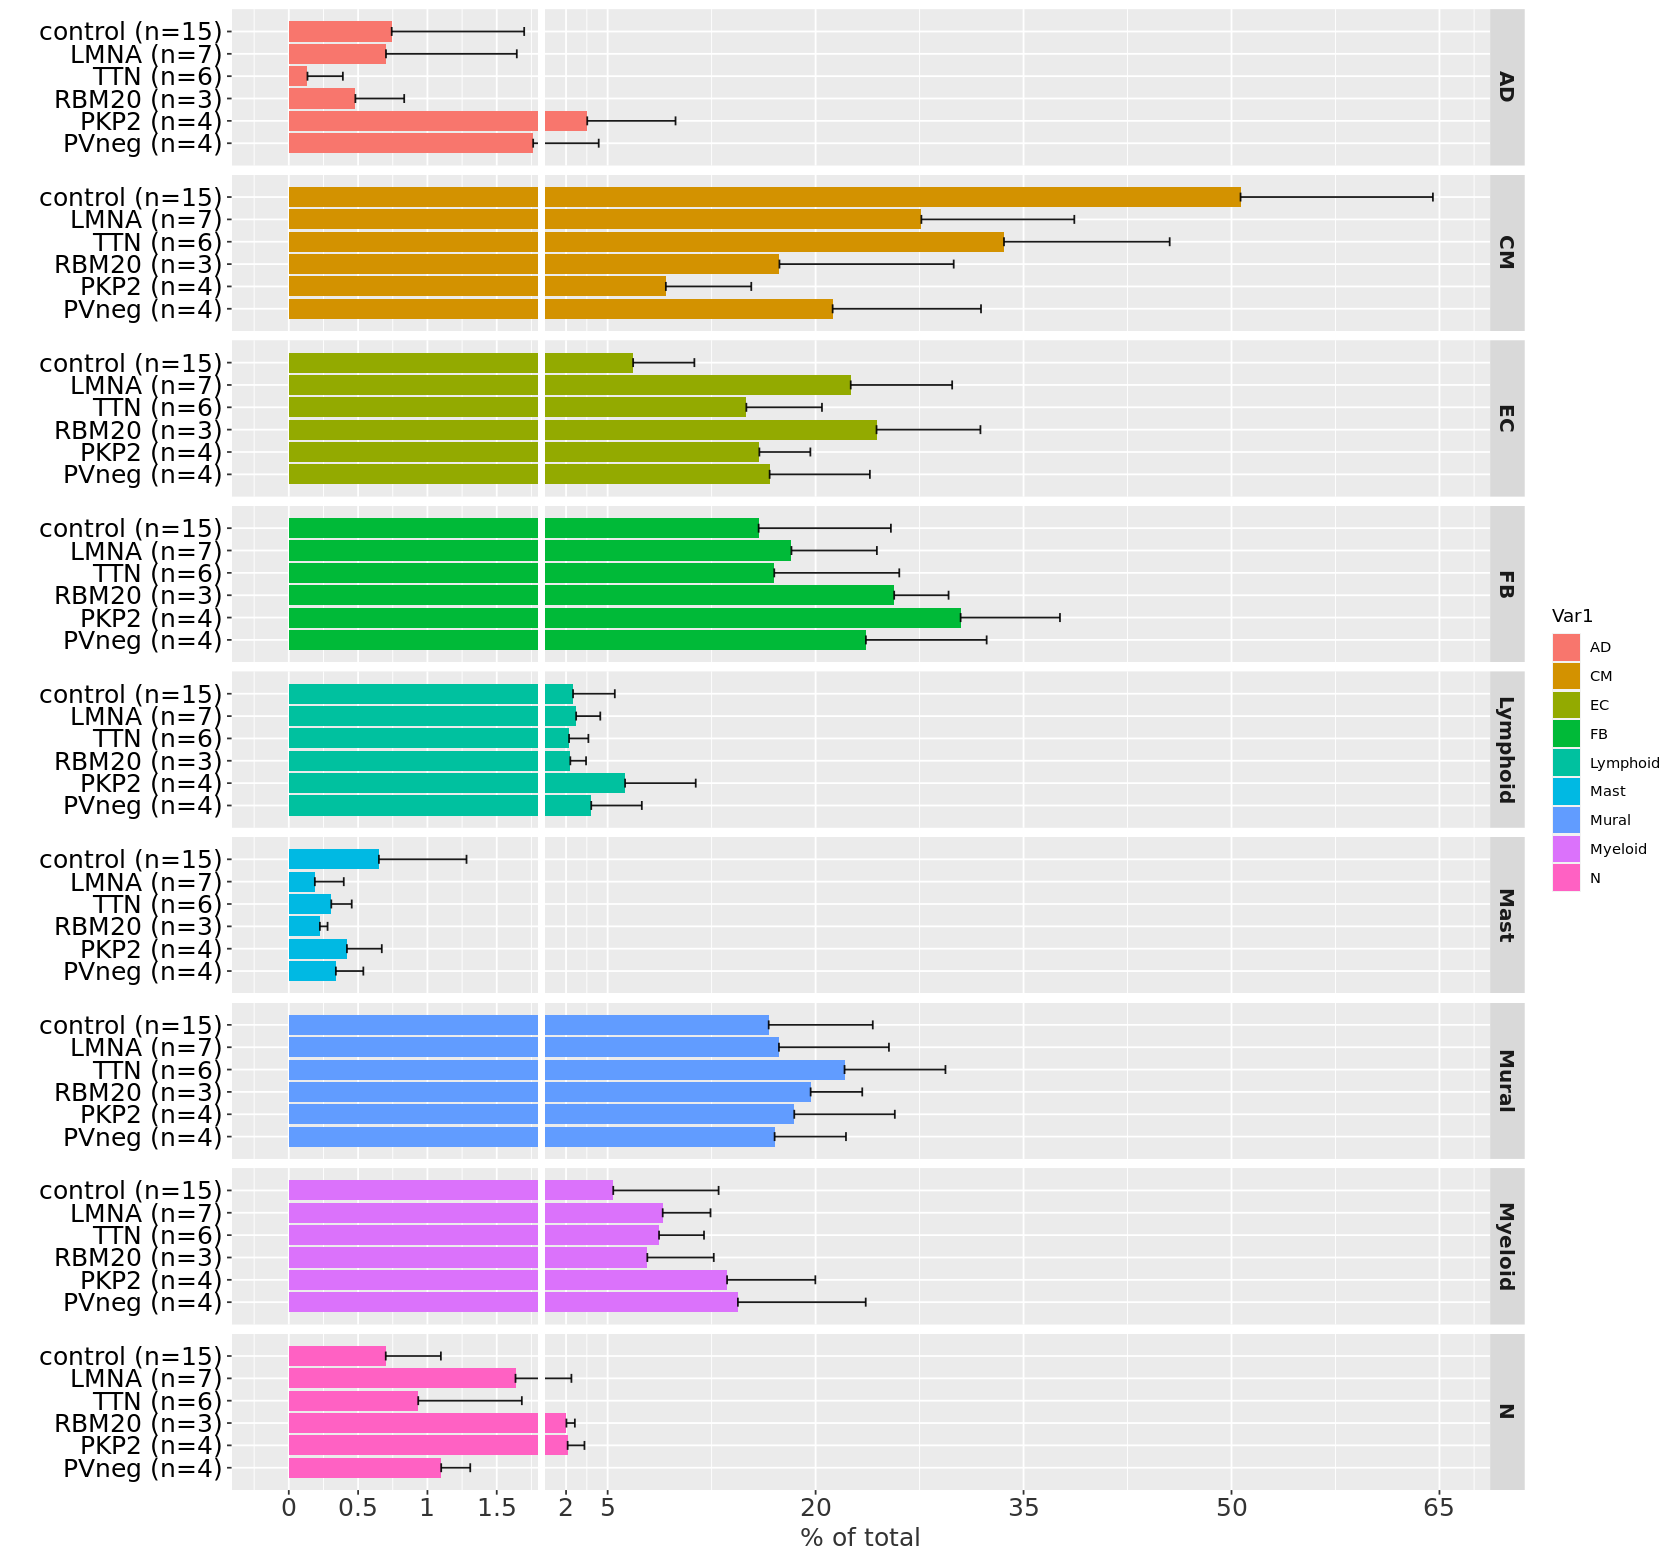

In [82]:
ggplot(dat, aes(x=mean_t, y=Var2, fill=Var1)) + facet_grid(Var1~.) + 
  xlab("% of total") + ylab("") +
  geom_bar(stat = "identity") + 
  geom_errorbar(aes(x=mean_t, y=Var2, xmin=mean_t, xmax=sd_up_t), width=0.4, colour="black", alpha=0.9, size=0.5) + 
  theme(axis.text.x = element_text(color = "grey20", size = 15, angle = 0, face = "plain"),
        axis.text.y = element_text(color = "black", size = 15, angle = 0, face = "plain"),
        axis.title = element_text(color = "grey20", size = 15, angle = 0, hjust = .5, vjust = .5, face = "plain"),
        strip.text = element_text(face="bold", size=12,lineheight=5.0)
  ) + #geom_vline(xintercept = 7.5) + 
  geom_rect(aes(ymin=0, ymax=7, xmin=1.8, xmax=1.85), fill="white") + 
  scale_x_continuous(limits=c(0,NA), breaks=trans(yticks), labels=yticks)

#dev.off()

In [85]:
dat[,"Var2_red"] <- gsub("\\(n=[0-9]*\\)", "", dat[,2])
dat$Var2_red <- factor(dat$Var2_red, 
                       levels=rev(unique(dat$Var2_red)[c(5,2,4,3,1,6)]))

In [86]:
options(repr.plot.width=14, repr.plot.height=17)

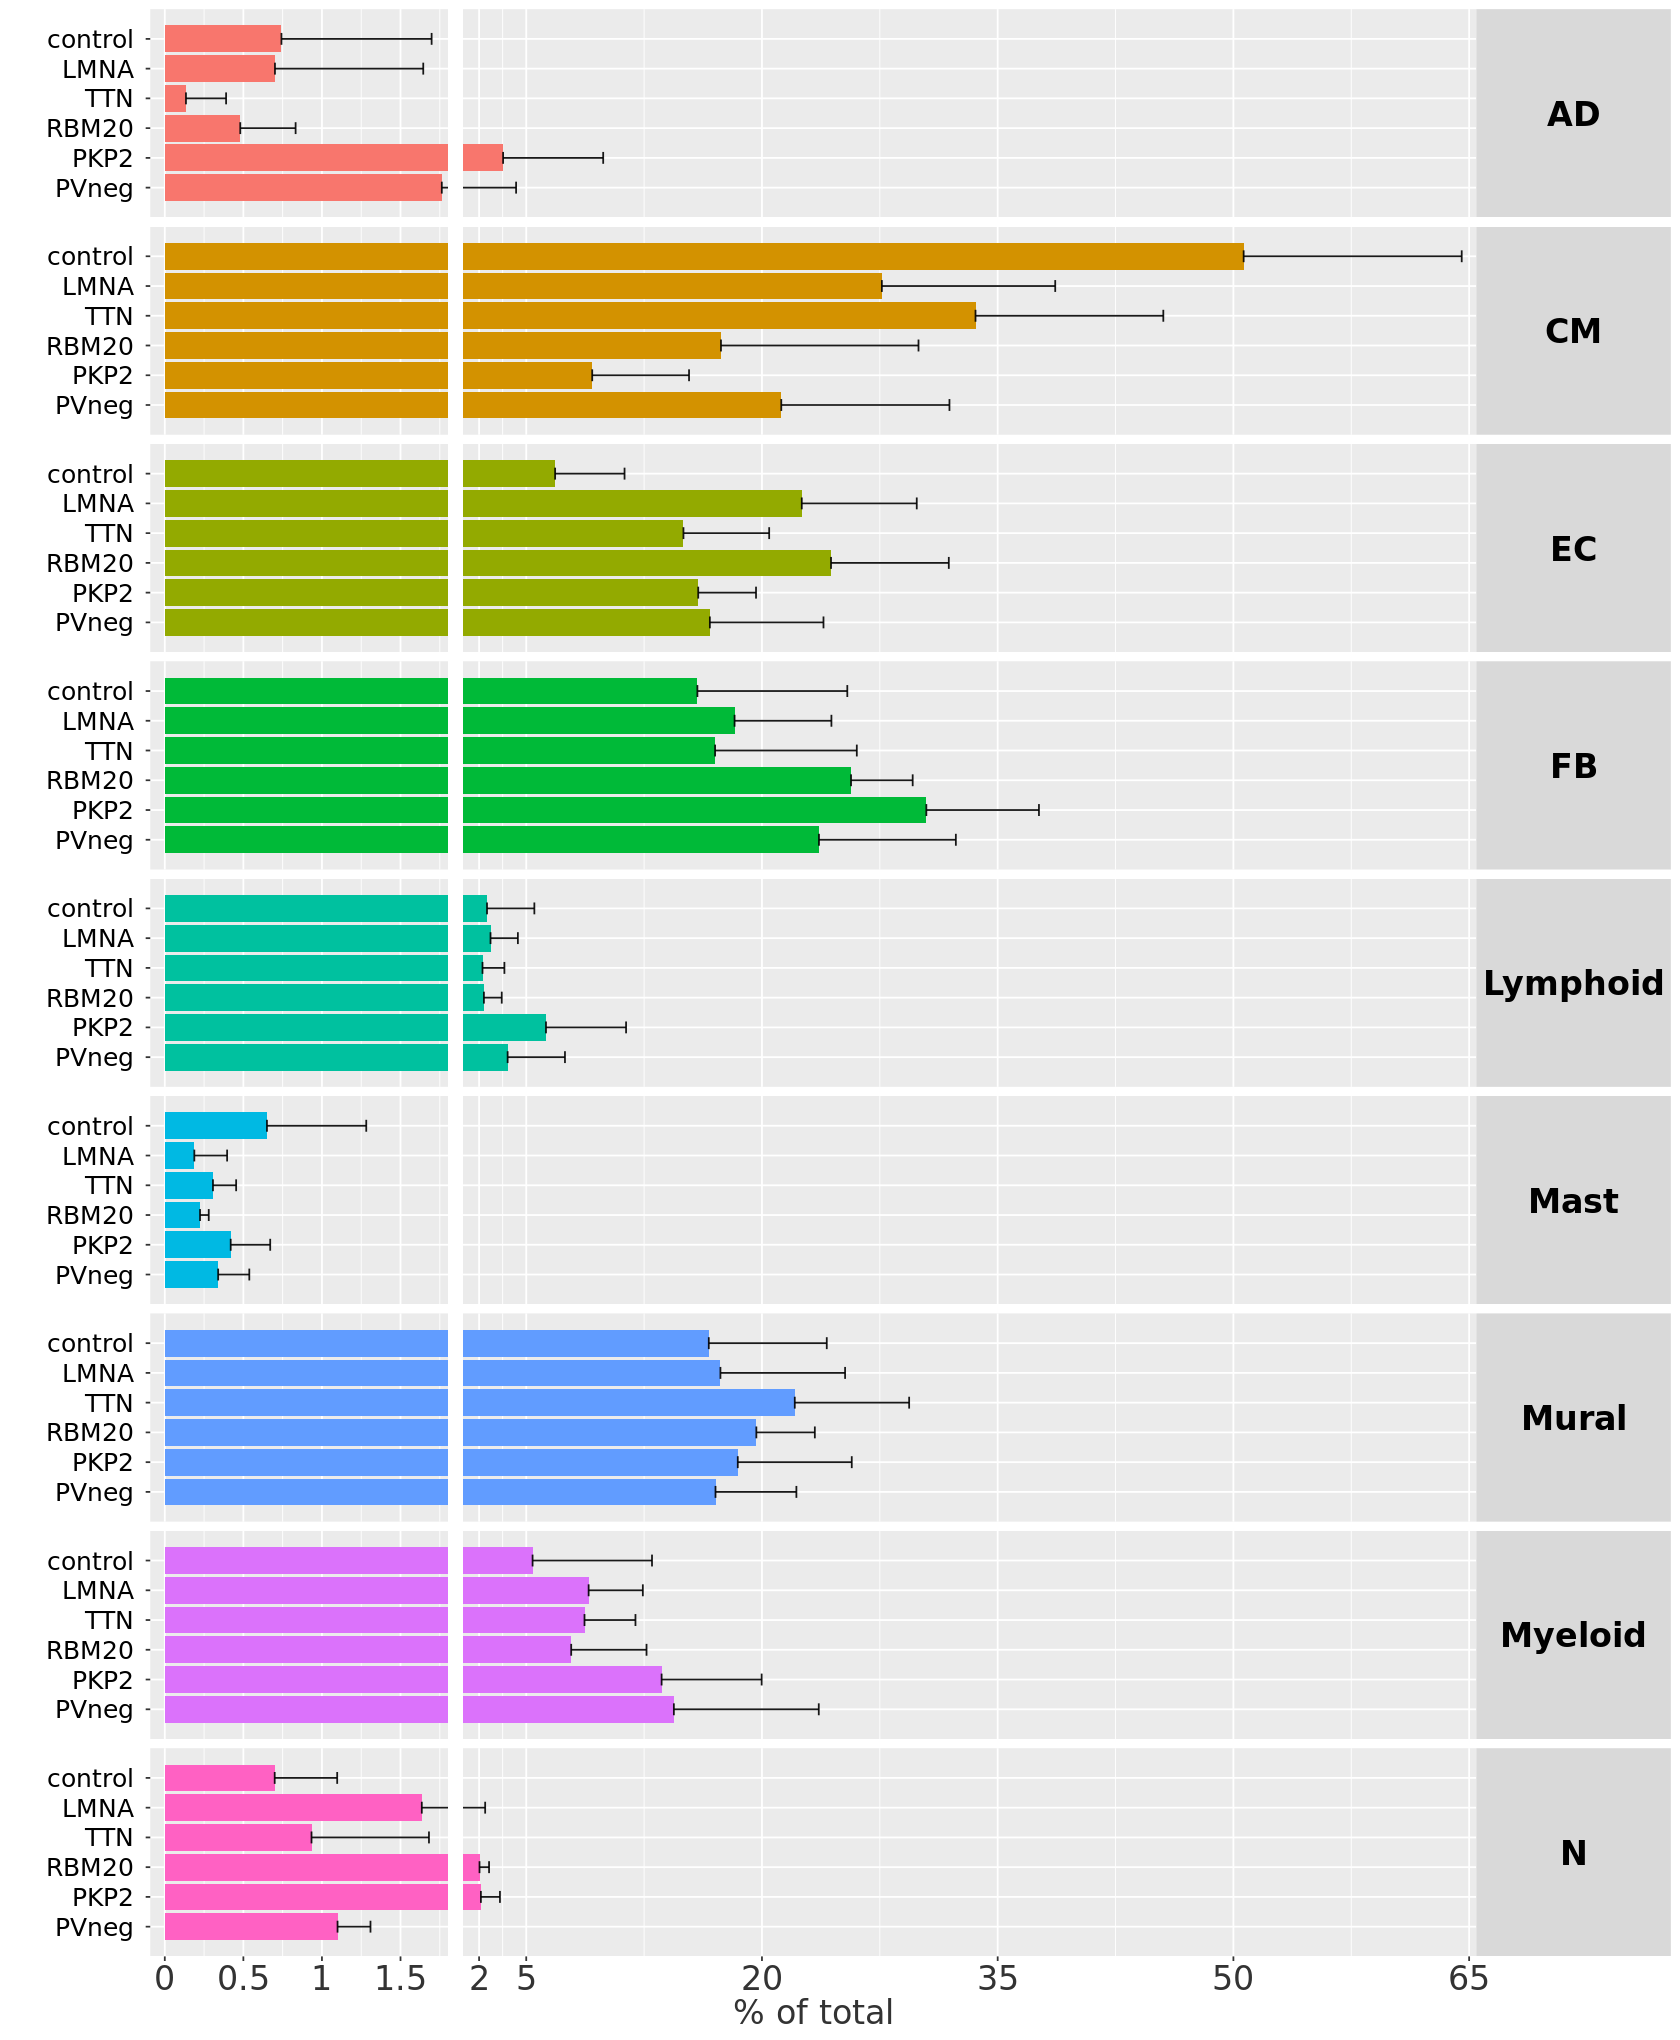

In [87]:
ggplot(dat, aes(x=mean_t, y=Var2_red, fill=Var1)) + facet_grid(Var1~.) + 
  xlab("% of total") + ylab("") +
  geom_bar(stat = "identity") + 
  geom_errorbar(aes(x=mean_t, y=Var2_red, xmin=mean_t, xmax=sd_up_t), width=0.4, colour="black", alpha=0.9, size=0.5) + 
  theme(axis.text.x = element_text(color = "grey20", size = 20, angle = 0, face = "plain"),
        axis.text.y = element_text(color = "black", size = 15, angle = 0, face = "plain"),
        axis.title = element_text(color = "grey20", size = 20, angle = 0, hjust = .5, vjust = .5, face = "plain"),
        strip.text = element_text(face="bold", size=12,lineheight=5.0),
        strip.text.y = element_text(size = 20, colour = "black", angle = 0),
        legend.position = "none"
  ) + #geom_vline(xintercept = 7.5) + 
  geom_rect(aes(ymin=0, ymax=7, xmin=1.8, xmax=1.9), fill="white") + 
  scale_x_continuous(limits=c(0,NA), breaks=trans(yticks), labels=yticks, expand = c(0.01, 0.01))
  

#dev.off()